### Disclaimer: I did not find the solution for this competition. Please check out the Leaderboard for winning notebooks. In this blog, my focus is text processing and labeling: how to look for scientific articles in a body of text, process the raw text and subsequently classify them with predefined labels.

## INPUT NOTEBOOK

EDA: https://www.kaggle.com/baotramduong/show-us-the-data-eda

Tags: https://www.kaggle.com/baotramduong/coleridge-initiative-get-tags

N-gram Models: https://www.kaggle.com/baotramduong/coleridge-initiative-n-gram-models

GRU: https://www.kaggle.com/baotramduong/coleridge-initiative-gru

Bidirectional LSTM: https://www.kaggle.com/baotramduong/coleridge-initiative-bidirectional-lstm

sep-CNN: https://www.kaggle.com/baotramduong/coleridge-initiative-sep-cnn

spaCy NER: https://www.kaggle.com/baotramduong/coleridge-initiative-spacy-ner

Capstone: https://www.kaggle.com/baotramduong/coleridge-initiative-ngram-lstm-gru-spacy

## BLOGS

Capstone (A Summary of All Models):

https://baotramduong.medium.com/discover-how-scientific-data-is-used-for-the-public-good-with-natural-language-processing-d9f8825e1dcf

N-gram Models:

https://baotramduong.medium.com/natural-language-processing-nlp-with-n-gram-models-coleridge-initiative-f18d5714b492

Deep Learning Models:

https://baotramduong.medium.com/natural-language-processing-nlp-with-deep-learning-models-rnn-cnn-coleridge-initiative-928f8d003b6d

spaCy NER:

https://baotramduong.medium.com/spacys-ner-model-to-identify-scientific-datasets-a336bec6190a

# INTRODUCTION

**Natural Language Processing (NLP)** is one of the branches of AI that gives the machines the ability to read, understand, and deliver meaning. NLP system needs to understand text, sign, and semantic properly. There are many methods that help the NLP system to understand text and symbols (Meparlad, 2020):

* Text classification: the process of categorizing the text into a group of words and assigning a set of predefined tags or categories based on its context.

* Vector semantic: defines semantic and interprets words meaning to explain features such as similar words and opposite words. The main idea behind vector semantic is two words are alike if they have used in a similar context. Vector semantic is useful in sentiment analysis.

* Word embedding: translates spares vectors into a low-dimensional space that preserves semantic relationships. Word embedding is a type of word representation that allows words with similar meaning to have a similar representation.

* Probabilistic language model: calculates the probability of a sentence of a sequence of words.

* Sequence labeling: assigns a class or label to each token in a given input sequence.

For this project, the focus is text processing and labeling: we want to look for scientific articles in a body of text and subsequently classify them with predefined labels. This is a big challenge since sequence prediction is considered as one of the hardest problems to solve in the data science industry.

We will discuss how to approach any NLP problem with techniques like n-gram, sequence vector, and spaCy NER. We will look at:

### Steps
1. Obtain Data
2. Data Scrubbing & Exploration
3. Data Annotation: Getting Train & Test Sentences
4. Data Preprocessing
5. Feature Extraction
6. Part 1: Building n-gram Models
7. Part 2: Building RNN Models: Bidirectional LSTM & GRU Model
8. Part 3: Building CNN Model: sep-CNN Model
9. Part 4: Building spaCy NER Model
10. Prediction on Test Set
11. Prepare Submission Data

## BUSINESS STATEMENTS

1. Can natural language processing find the hidden-in-plain-sight data citations?

2. Can machine learning find the link between the words used in research articles and the data referenced in the article?

## METHODOLOGY

In this competition, natural language processing (NLP) is used to automate the discovery of how scientific data are referenced in publications. I attempted:

* n-gram models (blog, n-gram notebook)
* Recurrent neural network (RNN) deep learning models (blog, Bidirectional LSTM notebook, GRU notebook)
* Convolutional neural network (CNN) deep learning models (blog, sep-CNN notebook)
* spaCy NER (blog, spaCy notebook)

### Metrics

The performance of the models are evaluated based on:
* Accuracy score
* Precision: True Negative (TN) or specificity to determine how good the model is at detecting negatives (Normal)
* Recall: True Positive (TP) or sensitivity to determine how good the model is at detecting the positives (Pneumonia)
* F1: harmonic mean of precision and recall

## SUMMARY OF FINDINGS

|#  |Model                            |Accuracy|CV  |Precision|Recall|F1  |
|---|---------------------------------|--------|----|---------|------|----|
|0  |CLF RandomForestClassifier       |0.75    |0.78|0.44     |0.45  |0.44|
|1  |CLF Linear Support Vector Machine|0.62    |0.62|0.21     |0.09  |0.11|
|2  |CLF MultinomialNB                |0.64    |0.62|0.25     |0.10  |0.12|
|3  |DL GRU                           |0.83    |-   |0.29     |0.33  |0.3 |
|4  |DL Bidirectional LSTM            |0.83    |-   |0.28     |0.31  |0.28|
|5  |DL sep-CNN                       |0.48    |-   |0.0      |0.01  |0.01|
|6  |spaCy NER                        |80.73   |-   |-        |-     |-   |

This discussion only aims at how to preprocess text and build models. Although accuracy is acceptable, Precision/ Recall/ and F1 are very low. More works are needed to be done in the future.

## ACTIONABLE INSIGHTS

## FUTURE WORKS

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coleridge-initiative-n-gram-models/clf_summary_table.csv
/kaggle/input/coleridge-initiative-n-gram-models/RandomForestClassifier_model.sav
/kaggle/input/coleridge-initiative-n-gram-models/__results__.html
/kaggle/input/coleridge-initiative-n-gram-models/submission.csv
/kaggle/input/coleridge-initiative-n-gram-models/__resultx__.html
/kaggle/input/coleridge-initiative-n-gram-models/SGDClassifier_model.sav
/kaggle/input/coleridge-initiative-n-gram-models/__notebook__.ipynb
/kaggle/input/coleridge-initiative-n-gram-models/__output__.json
/kaggle/input/coleridge-initiative-n-gram-models/MultinomialNB_model.sav
/kaggle/input/coleridge-initiative-n-gram-models/custom.css
/kaggle/input/coleridge-initiative-bidirectional-lstm/lstm_acc_loss.png
/kaggle/input/coleridge-initiative-bidirectional-lstm/lstm_summary_table.csv
/kaggle/input/coleridge-initiative-bidirectional-lstm/__results__.html
/kaggle/input/coleridge-initiative-bidirectional-lstm/submission.csv
/kaggle/input/coleridge

## Libraries

In [2]:
import pandas as pd
import numpy as np
import random
import time
import datetime
from itertools import chain
import re
import json
from tqdm.autonotebook import tqdm
import string
import collections
from textblob import TextBlob
from pathlib import Path
import collections
import pickle

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

from keras.preprocessing import sequence, text
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import utils
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers import Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.utils.vis_utils import plot_model

import en_core_web_lg
import spacy
from spacy.lang.en import English
from spacy.util import minibatch, compounding
from spacy import displacy

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  if __name__ == '__main__':


In [3]:
#define stopwords
from nltk.corpus import stopwords

stopwords_list = stopwords.words('english') + list(string.punctuation)
stopwords_list += ["''", '""', '...', '``']

# OBTAIN, SCRUB & EDA

In [4]:
#define paths
os.listdir('/kaggle/input/coleridgeinitiative-show-us-the-data/')
train_path = '../input/coleridgeinitiative-show-us-the-data/train'
test_path = '../input/coleridgeinitiative-show-us-the-data/test'

In [5]:
#create a function to get the text from the JSON file and append it to the new column in table
def read_json_pub(filename, train_path = train_path, output = 'text'):
    json_path = os.path.join(train_path, (filename + '.json'))
    headings = []
    contents = []
    combined = []
    with open(json_path, 'r') as f:
        json_decode = json.load(f)
        for data in json_decode:
            headings.append(data.get('section_title'))
            contents.append(data.get('text'))
            combined.append(data.get('section_title'))
            combined.append(data.get('text'))
    
    all_headings = ' '.join(headings)
    all_contents = ' '.join(contents)
    all_data = '. '.join(combined)
    
    if output == 'text':
        return all_contents
    elif output == 'head':
        return all_headings
    else:
        return all_data

In [6]:
#read 
train = pd.read_csv('../input/coleridgeinitiative-show-us-the-data/train.csv')

#review
train.head()

,Id,pub_title,dataset_title,dataset_label,cleaned_label
0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b,The Impact of Dual Enrollment on College Degre...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
1,2f26f645-3dec-485d-b68d-f013c9e05e60,Educational Attainment of High School Dropouts...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29,Differences in Outcomes for Female and Male St...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af,Stepping Stone and Option Value in a Model of ...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
4,c754dec7-c5a3-4337-9892-c02158475064,"Parental Effort, School Resources, and Student...",National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study


In [7]:
#get text
tqdm.pandas()
train['text'] = train['Id'].progress_apply(read_json_pub)

  0%|          | 0/19661 [00:00<?, ?it/s]

In [8]:
#review
train.head()

,Id,pub_title,dataset_title,dataset_label,cleaned_label,text
0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b,The Impact of Dual Enrollment on College Degre...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,This study used data from the National Educati...
1,2f26f645-3dec-485d-b68d-f013c9e05e60,Educational Attainment of High School Dropouts...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,Dropping out of high school is not necessarily...
2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29,Differences in Outcomes for Female and Male St...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,", stress satisfactory outcomes for all youth,..."
3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af,Stepping Stone and Option Value in a Model of ...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,Federal Reserve Bank of Richmond S1. Accountin...
4,c754dec7-c5a3-4337-9892-c02158475064,"Parental Effort, School Resources, and Student...",National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,This article investigates an important factor ...


## SCRUB

Before we can create a bag of words or vectorize each document, we need to clean it up or else we will run into the following problems:
* Counting things that aren't actually words.
* Punctuation and capitalization would mess up our word counts

Text cleaning steps vary according to the type of data and the required task. Generally, the string is converted to lowercase and punctuation is removed before text gets tokenized. With this dataset where the particular task is to find the exact matched strings of the dataset's dataset_title, dataset_label, cleaned_label, only a simple clean is needed in order to preserve the exact wording of these strings.

In [9]:
def clean_text(txt):
     return re.sub('[^A-Za-z0-9.]+', ' ', str(txt).lower())

## EDA

For the full EDA of this dataset, see notebook: https://www.kaggle.com/baotramduong/show-us-the-data-eda 

In [10]:
#create a frequency distribution to see which words are used the most
words = list( train['cleaned_label'].values)
stopwords = stopwords_list
split_words = []
for word in words:
    lo_w = []
    list_of_words = str(word).split()
    for w in list_of_words:
        if w not in stopwords:
            lo_w.append(w)
    split_words.append(lo_w)
allwords = []
for wordlist in split_words:
    allwords += wordlist
    
#get 100 most common words
mostcommon = FreqDist(allwords).most_common(100)
mostcommon

[('adni', 6073),
 ('study', 5338),
 ('longitudinal', 4175),
 ('disease', 2503),
 ('neuroimaging', 2471),
 ('initiative', 2471),
 ('alzheimer', 2422),
 ('survey', 2365),
 ('aging', 1614),
 ('baltimore', 1589),
 ('education', 1447),
 ('international', 1338),
 ('science', 1316),
 ('trends', 1163),
 ('mathematics', 1163),
 ('early', 1011),
 ('childhood', 1011),
 ('national', 936),
 ('genome', 860),
 ('sars', 804),
 ('cov', 804),
 ('2', 804),
 ('census', 743),
 ('agriculture', 743),
 ('data', 686),
 ('agricultural', 647),
 ('management', 647),
 ('resource', 623),
 ('north', 585),
 ('american', 585),
 ('breeding', 585),
 ('bird', 585),
 ('world', 549),
 ('noaa', 548),
 ('earned', 509),
 ('doctorates', 509),
 ('rural', 490),
 ('urban', 490),
 ('continuum', 490),
 ('codes', 490),
 ('students', 476),
 ('sequences', 462),
 ('beginning', 461),
 ('postsecondary', 461),
 ('blsa', 433),
 ('sequence', 398),
 ('common', 368),
 ('core', 368),
 ('19', 362),
 ('research', 341),
 ('tide', 334),
 ('databas

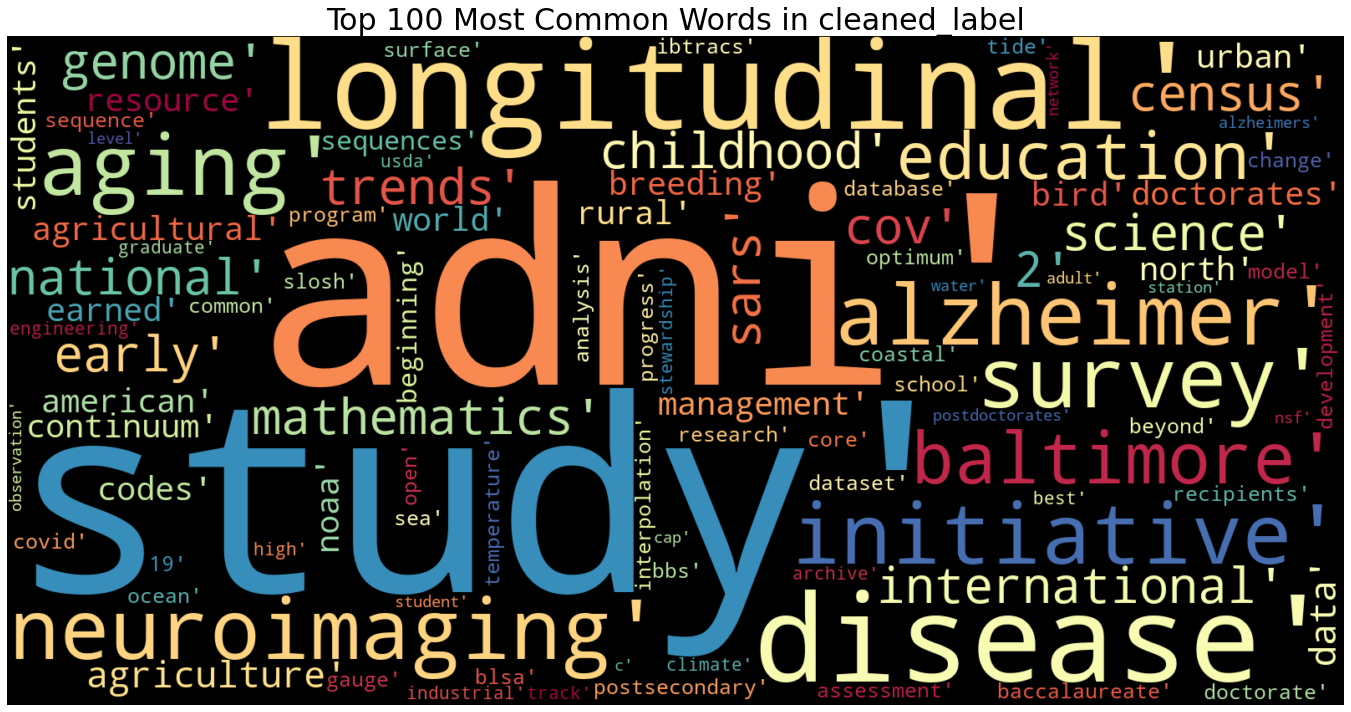

In [11]:
#plot frequency distributions
wordcloud = WordCloud(width = 1600, height = 800, 
                      background_color = 'black', 
                      colormap = 'Spectral', 
                      stopwords = stopwords_list).generate(str(mostcommon))

fig = plt.figure(figsize = (20, 10), facecolor = 'white')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top 100 Most Common Words in cleaned_label', fontsize = 30)
plt.tight_layout()

#save
plt.savefig('cleaned_label_wordcloud.png')

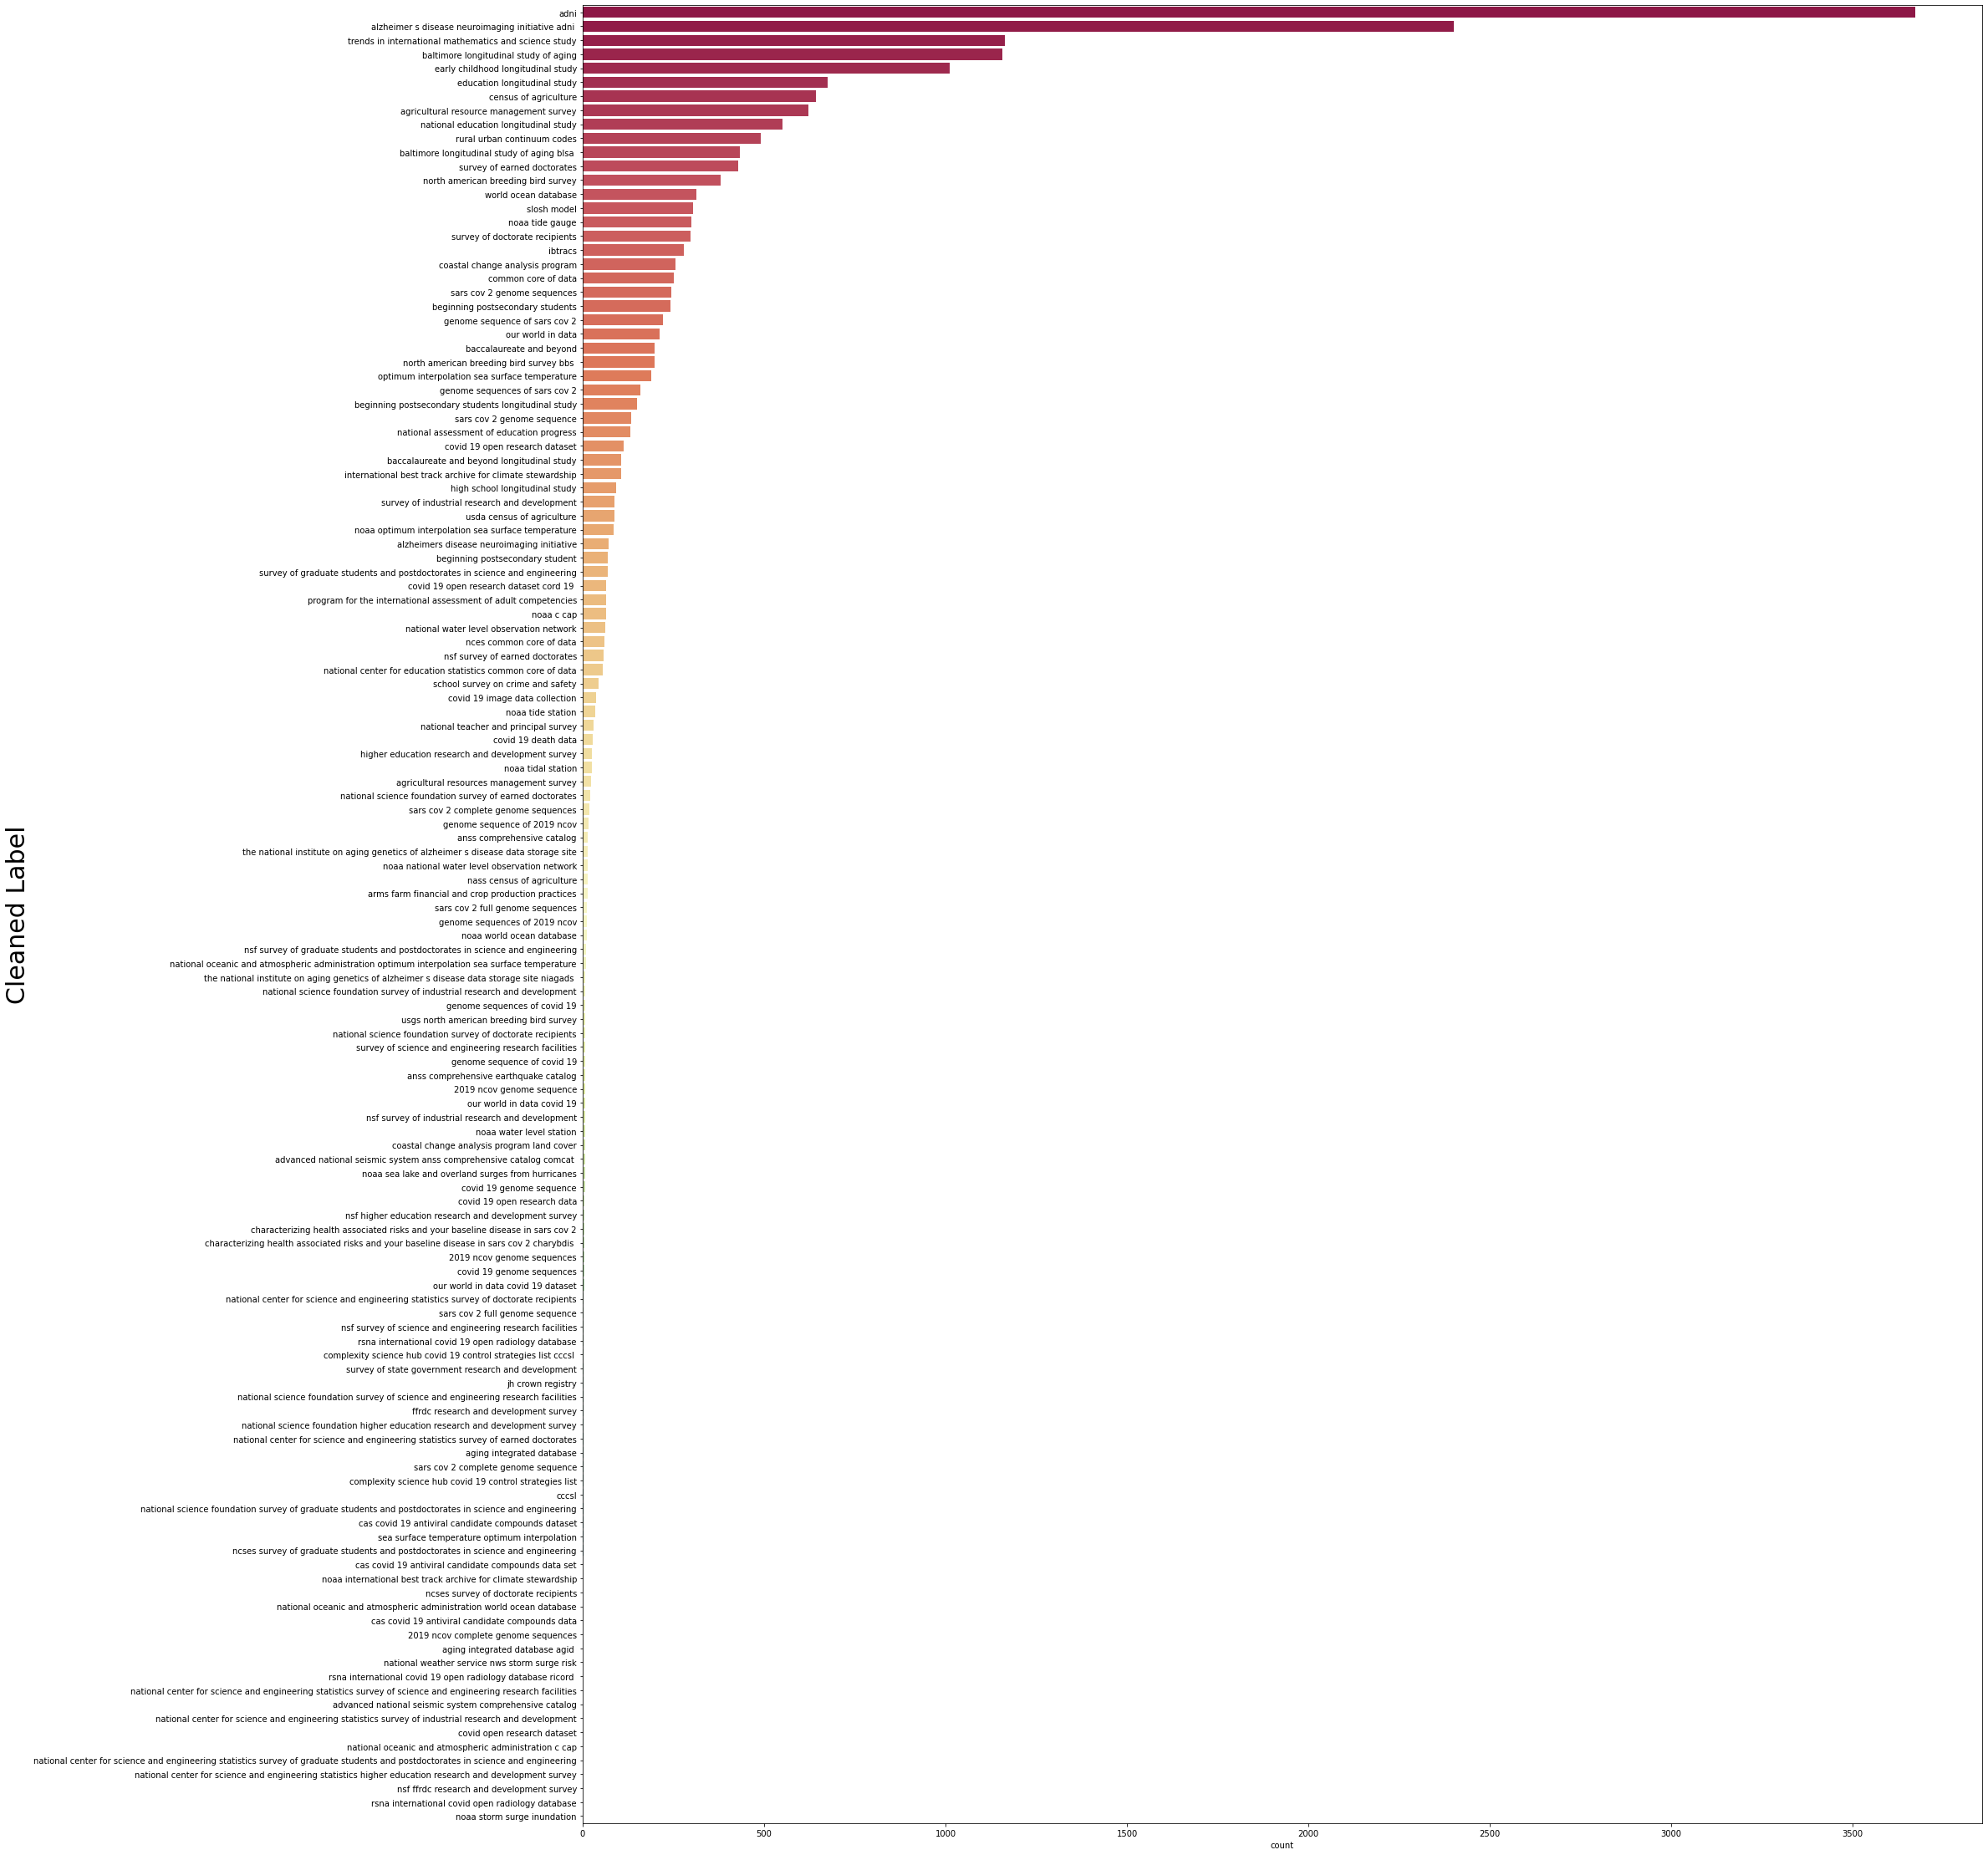

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize = (30, 40)),

sns.countplot(y = train['cleaned_label'], 
              order = train['cleaned_label'].value_counts().index, 
              palette = 'Spectral')
plt.ylabel('Cleaned Label',fontsize = 30)
plt.show()

#save
plt.savefig('cleaned_label.png')

# DATA ANNOTATION: GETTING SENTENCES & LABELS

Using the following code, we read each individual publication and break it down into sentences using **sent_tokenize** function from the nltk (Natural Language Toolkit), which is a leading platform for building Python programs to work with human language data. For each sentence, we will use **.search** to search for matching **dataset_title**, **dataset_label**, **cleaned_label** in each of the sentences. When a match is found, it will be returned as a tuple containing starting and ending index of the matched string and labeled as **DATASET**.

To process the sentence, we use 2 functions **clean_text** and **shorten_sentences** to process the text. Since we need to preserve the exact words for **dataset_title**, the text cleaning process is simple with removing special characters and lower-casing. Then we break the sentences into shorter sentences.

In [13]:
MAX_LENGTH = 64
OVERLAP = 20
    
def shorten_sentences(sentences):
    """
    Sentences that have more than MAX_LENGTH words will be split
    into multiple sentences with overlappings.
    """
    short_sentences = []
    for sentence in sentences:
        words = sentence.split()
        if len(words) > MAX_LENGTH:
            for p in range(0, len(words), MAX_LENGTH - OVERLAP):
                short_sentences.append(' '.join(words[p:p+MAX_LENGTH]))
        else:
            short_sentences.append(sentence)
    return short_sentences

In [14]:
import nltk

DATA = []
label_count = 0
empty_count = 0

for idx,row in tqdm(train.iterrows()):
    pub = "../input/coleridgeinitiative-show-us-the-data/train/" + row.Id + ".json"            
    f = open(pub)  
    data = json.load(f)      

    balanced = False
    
    sentences = [clean_text(sentence) for sentence in nltk.sent_tokenize(str(data))]
    sentences = shorten_sentences(sentences) # make sentences short
    sentences = [sentence for sentence in sentences if len(sentence) > 10] # only accept sentences with length > 10 chars
    
    for sentence in sentences:          
      
        a = re.search(row.cleaned_label.lower(), sentence)      
        b = re.search(row.dataset_label.lower(), sentence)
        c = re.search(row.dataset_title.lower(), sentence)
        cleaned_label = row.cleaned_label.lower()
        dataset_label = row.dataset_label.lower()
        dataset_title = row.dataset_title.lower()
        
        if  a != None:
            DATA.append((sentence, cleaned_label))
            label_count = label_count + 1
            balanced = True
        elif b != None:
            DATA.append((sentence, dataset_label))
            label_count = label_count + 1
            balanced = True
        elif c != None:
            DATA.append((sentence, dataset_title))
            label_count = label_count + 1
            balanced = True            
        else:
            if balanced:
                empty_count = empty_count + 1
                balanced = False
    
print('Text with dataset:', label_count)
print('Text without dataset:', empty_count)

0it [00:00, ?it/s]

Text with dataset: 64512
Text without dataset: 50303


In [15]:
#get dataframe
train_df = pd.DataFrame(DATA)
train_df = train_df.rename({0: 'Sentence', 1: 'Label'}, axis = 1)

#review
train_df.tail(10)

,Sentence,Label
64502,the international community came together to b...,rsna international covid open radiology database
64503,then several 3cl pro ligand complexes are used...,cas covid 19 antiviral candidate compounds dat...
64504,mccs was then applied to carry out the virtual...,cas covid 19 antiviral candidate compounds dat...
64505,section title repurposing cas covid 19 antivi...,cas covid 19 antiviral candidate compounds dat...
64506,using this data we applied a variety of machin...,cas covid 19 antiviral candidate compounds dat...
64507,nearly 50 000 substances from the cas covid 19...,cas covid 19 antiviral candidate compounds dat...
64508,the model was then also applied to the cas cov...,cas covid 19 antiviral candidate compounds dat...
64509,using suitable binary classifiers we were able...,cas covid 19 antiviral candidate compounds dat...
64510,after data cleaning and chemical structure sta...,cas covid 19 antiviral candidate compounds dat...
64511,after data cleaning and chemical structure sta...,cas covid 19 antiviral candidate compounds data


In [16]:
print(train_df['Sentence'][1000])
print('\n')
print(train_df['Label'][1000])

using data from the baltimore longitudinal study of aging blsa we are able to generate systems level models of biological and physiological function and then demonstrate how these networks change with age.


baltimore longitudinal study of aging blsa 


In [17]:
print(train_df['Sentence'][15689])
print('\n')
print(train_df['Label'][15678])

while further investigations are required the current recommendation would be to match the adni protocol.


adni


In [18]:
print(train_df['Sentence'][23456])
print('\n')
print(train_df['Label'][23456])

although research from the alzheimer s disease neuroimaging initiative adni has been at the forefront of the development of diagnostic methods and biomarkers for ad adni also relies on mmse and lm scores to determine eligibility. nthe extent to which mmse and lm scores are being used as eligibility criteria in ad clinical trials and diagnostic studies is unclear and no study has examined


adni


In [19]:
#create a frequency distribution to see which words are used the most
words = list( train_df['Sentence'].values)
stopwords = stopwords_list
split_words = []
for word in words:
    lo_w = []
    list_of_words = str(word).split()
    for w in list_of_words:
        if w not in stopwords:
            lo_w.append(w)
    split_words.append(lo_w)
allwords = []
for wordlist in split_words:
    allwords += wordlist
    
#get 100 most common words
mostcommon = FreqDist(allwords).most_common(100)
mostcommon

[('adni', 39037),
 ('data', 25564),
 ('study', 22767),
 ('longitudinal', 13512),
 ('text', 13230),
 ('section', 13226),
 ('title', 12525),
 ('disease', 11238),
 ('national', 11090),
 ('alzheimer', 10421),
 ('education', 9987),
 ('neuroimaging', 9341),
 ('students', 9327),
 ('n', 8853),
 ('initiative', 8586),
 ('survey', 8109),
 ('ad', 7983),
 ('2', 7794),
 ('postsecondary', 7686),
 ('used', 7580),
 ('1', 7307),
 ('using', 6813),
 ('subjects', 6594),
 ('year', 6433),
 ('beginning', 6223),
 ('mci', 6201),
 ('et', 5582),
 ('science', 5409),
 ('al.', 5316),
 ('database', 5158),
 ('first', 4997),
 ('mri', 4437),
 ('school', 4423),
 ('analysis', 4414),
 ('international', 4400),
 ('early', 4349),
 ('obtained', 4172),
 ('cohort', 4170),
 ('dataset', 3962),
 ('participants', 3926),
 ('3', 3909),
 ('imaging', 3860),
 ('4', 3691),
 ('based', 3672),
 ('center', 3598),
 ('clinical', 3580),
 ('cognitive', 3577),
 ('aging', 3558),
 ('methods', 3501),
 ('studies', 3443),
 ('statistics', 3435),
 ('rese

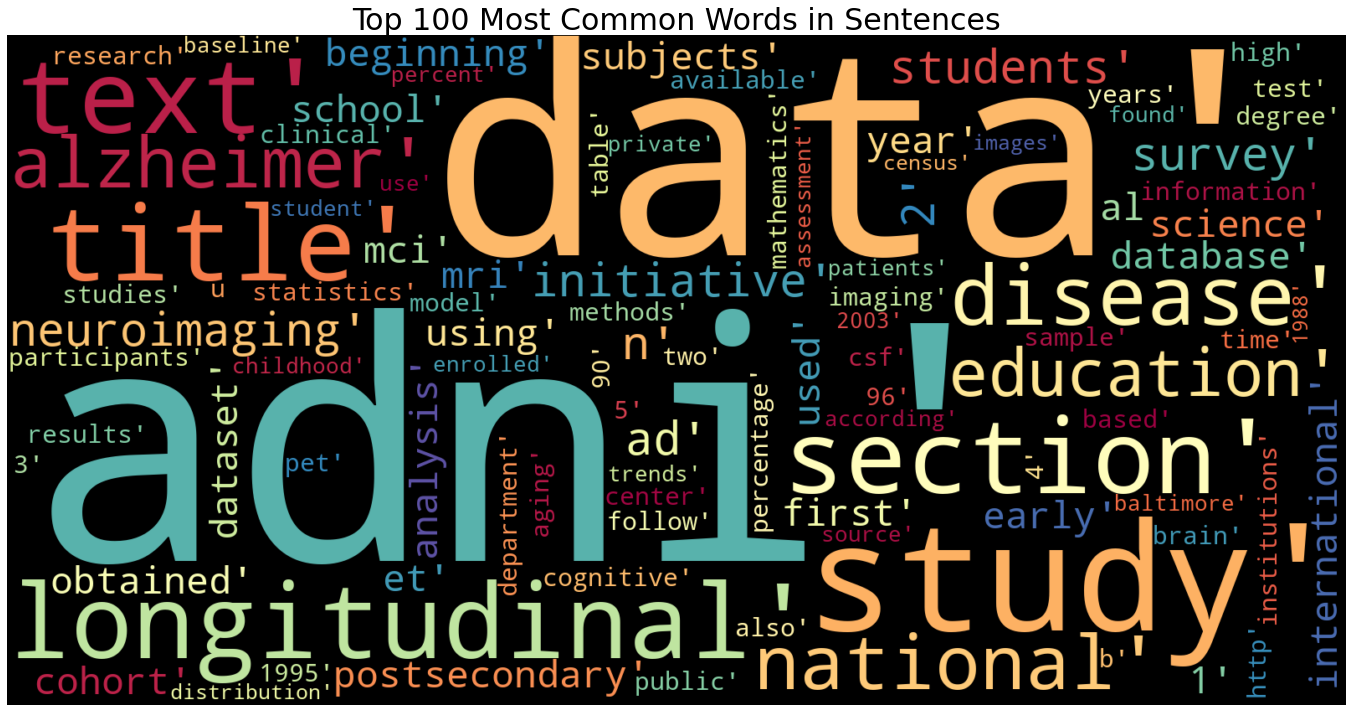

In [20]:
#plot frequency distributions
wordcloud = WordCloud(width = 1600, height = 800, 
                      background_color = 'black', 
                      colormap = 'Spectral', 
                      stopwords = stopwords_list).generate(str(mostcommon))

fig = plt.figure(figsize = (20, 10), facecolor = 'white')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top 100 Most Common Words in Sentences', fontsize = 30)
plt.tight_layout()

#save
plt.savefig('sentence_wordcloud.png')

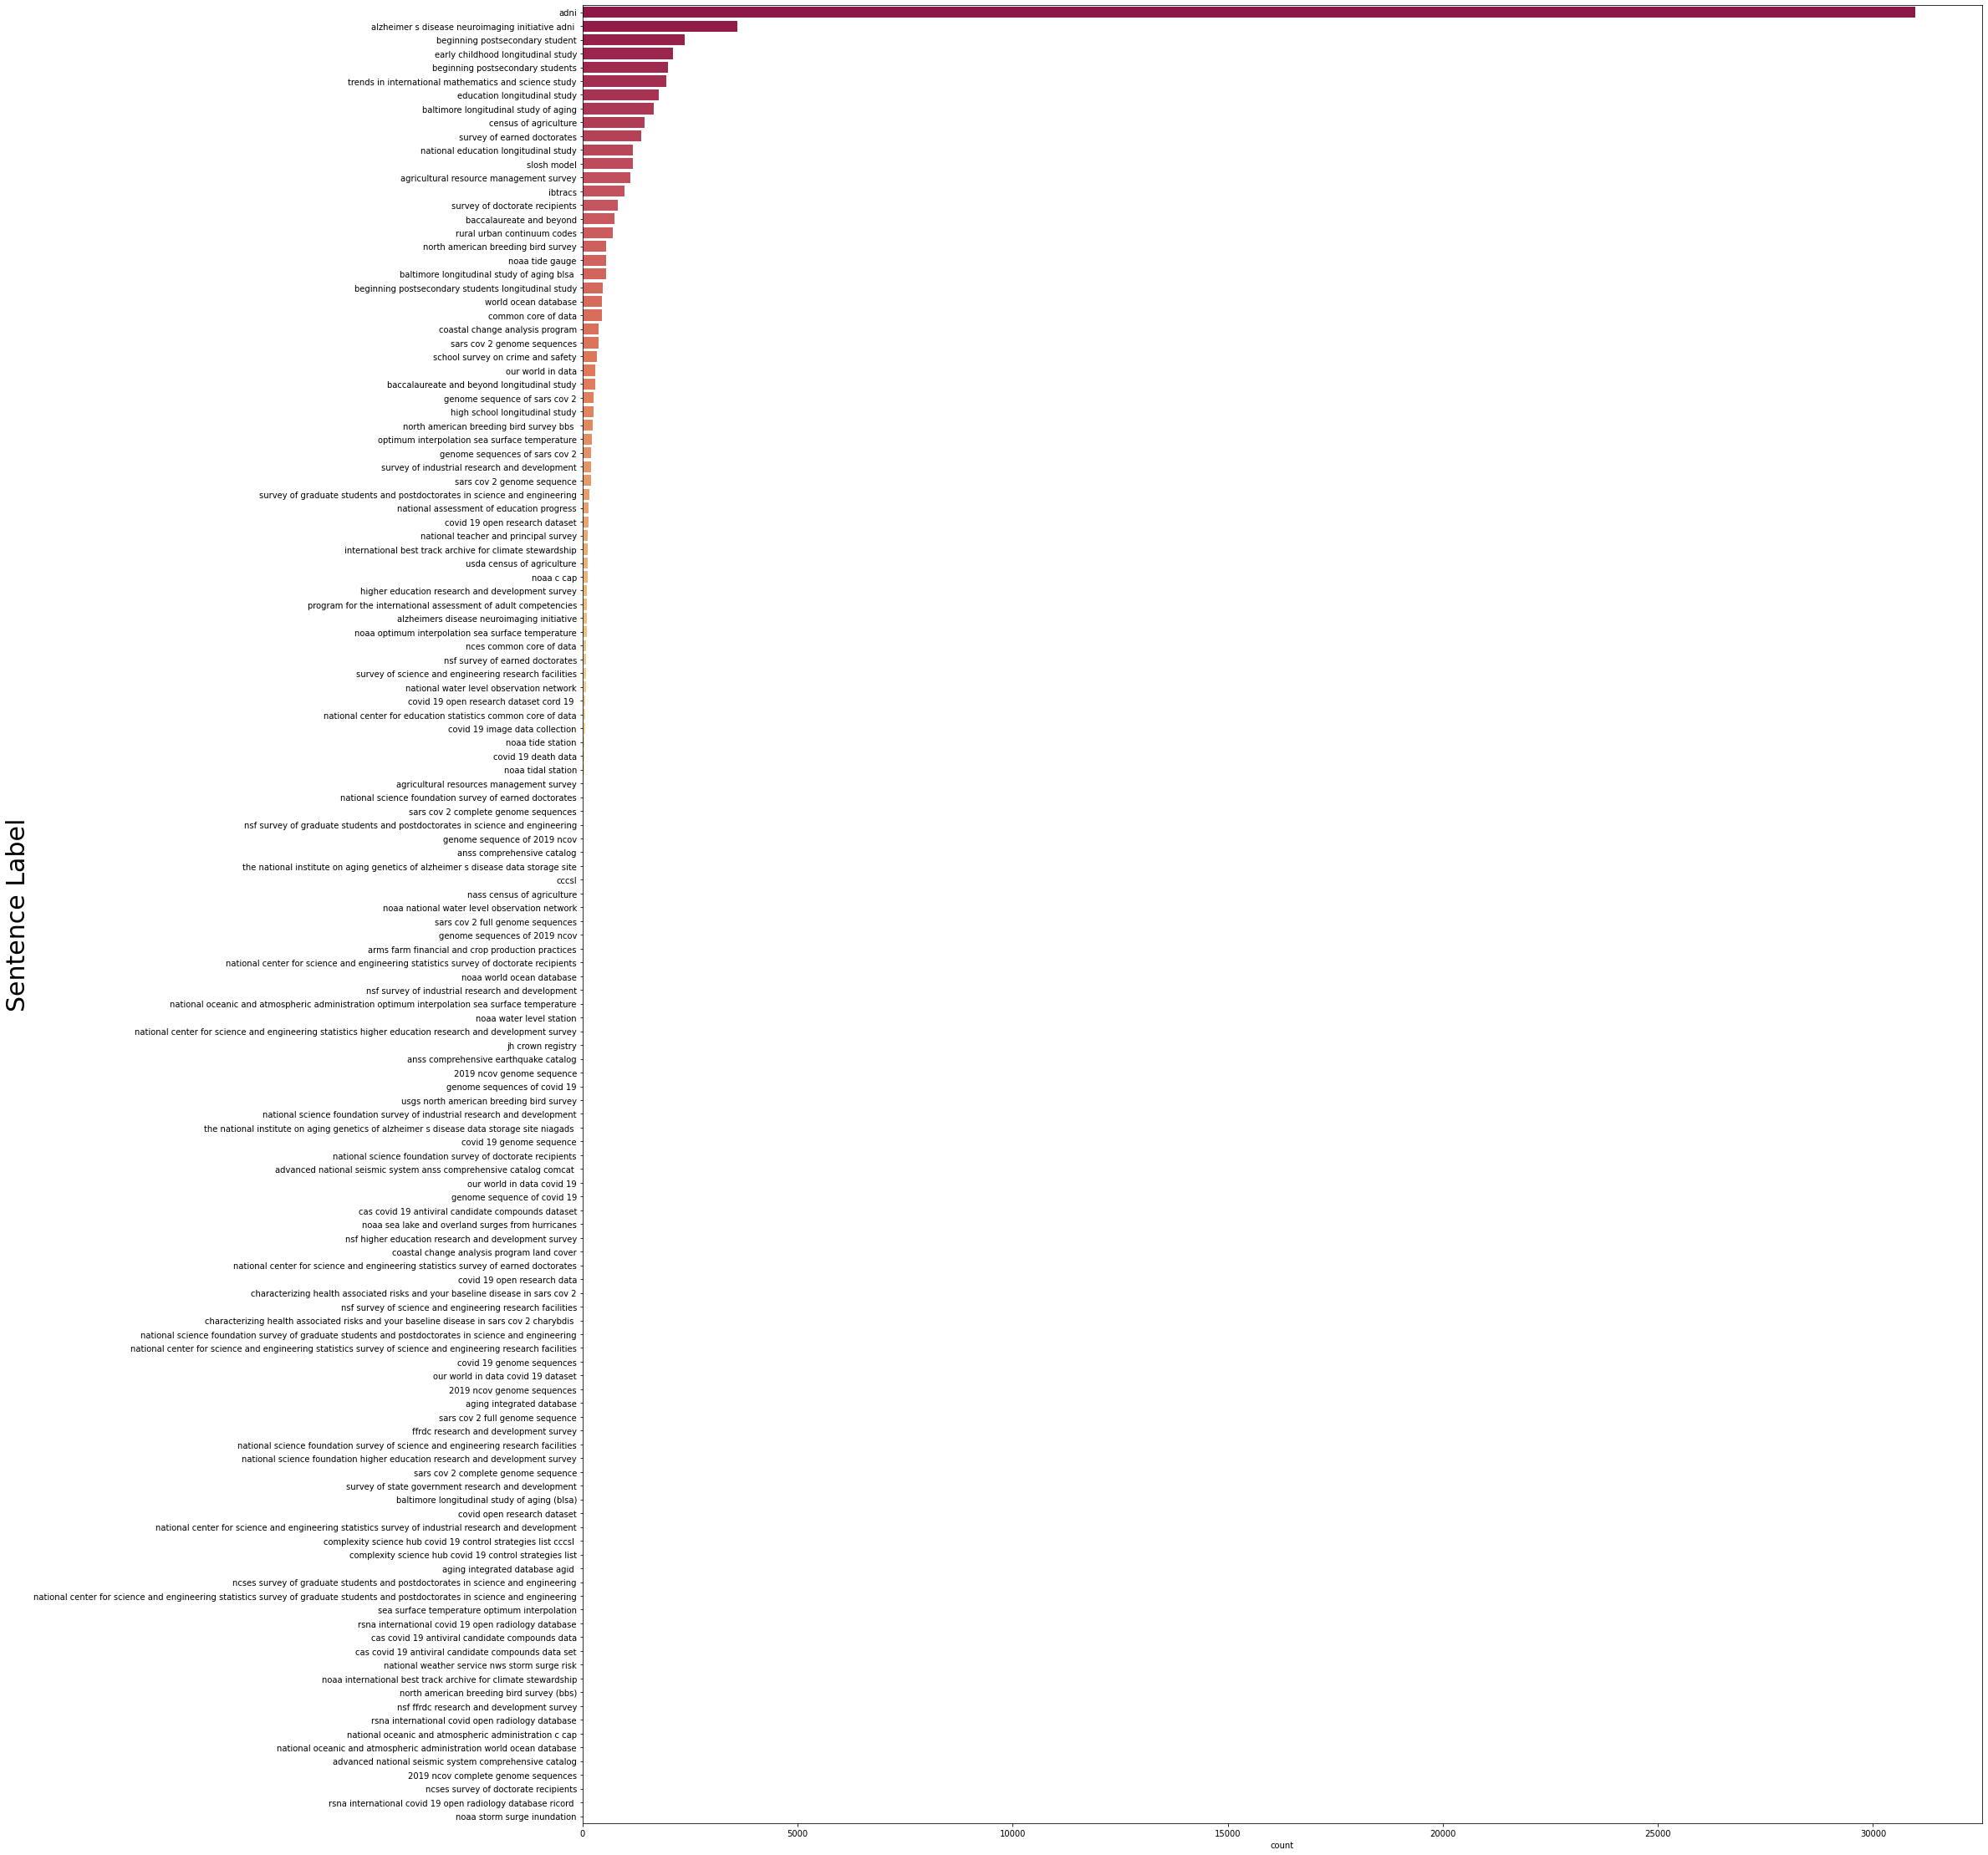

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize = (30, 40)),

sns.countplot(y = train_df['Label'], 
              order = train_df['Label'].value_counts().index, 
              palette = 'Spectral')
plt.ylabel('Sentence Label',fontsize = 30)
plt.show()

#save
plt.savefig('sentence_label.png')

Our learning algorithm will take in a single text input **Sentence** and output a single classification **Label**.

In [22]:
#save to dataframe
train_df = pd.DataFrame(DATA)
train_df = train_df.rename({0: 'Sentence', 1: 'Label'}, axis = 1)

#review
train_df.tail(10)

,Sentence,Label
64502,the international community came together to b...,rsna international covid open radiology database
64503,then several 3cl pro ligand complexes are used...,cas covid 19 antiviral candidate compounds dat...
64504,mccs was then applied to carry out the virtual...,cas covid 19 antiviral candidate compounds dat...
64505,section title repurposing cas covid 19 antivi...,cas covid 19 antiviral candidate compounds dat...
64506,using this data we applied a variety of machin...,cas covid 19 antiviral candidate compounds dat...
64507,nearly 50 000 substances from the cas covid 19...,cas covid 19 antiviral candidate compounds dat...
64508,the model was then also applied to the cas cov...,cas covid 19 antiviral candidate compounds dat...
64509,using suitable binary classifiers we were able...,cas covid 19 antiviral candidate compounds dat...
64510,after data cleaning and chemical structure sta...,cas covid 19 antiviral candidate compounds dat...
64511,after data cleaning and chemical structure sta...,cas covid 19 antiviral candidate compounds data


In [23]:
from sklearn.model_selection import train_test_split

X = train_df['Sentence'].to_numpy()
y = train_df['Label'].to_numpy()

# PREPROCESSING FOR N-GRAM MODELS

Models that process the tokens independently i.e. not taking into account word order, is called n-gram models. An n-gram model is the simplest model that assigns probabilities to sentences and sequences of words. An n-gram is a sequence of n-words in a sentence, for example, a 2-gram or bigram is a two-word sequence of words and a 3-gram or trigram is three-word sequence of words.

With n-gram, we discard a lot of information about word order and grammar. This is called a bag-of-words approach. This representation is used in conjunction with models that don't take ordering into account, such as logistic regression, multi-layer perceptrons, gradient boosting machines, support vector machines. 

As such, for this part of the project, we will build 3 n-gram models:
* **Model 1: RandomForestClassifier**
* **Model 2 : Linear Support Vector Machine**
* **Model 3: MultinomialNB**

## Summary of Steps
* Tokenize text samples into word in the range of (1, 4)-grams
* Vectorize using tf-idf encoding
* Select only the top 20,000 features from the vector of tokens by discarding tokens that appear fewer than 2 times and using f_classif to calculate feature importance

## Train-Test-Split

We need to split our dataset into a training and validation set. We'll use 80% of the dataset as the training data and evaluate the performance on the remaining 20% (holdout set):

In [24]:
#split traing data into training a validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

## TF-IDF Vectorize

Before our data can be fed to a model, it needs to be transformed to a format the model can understand. Vectorization turns text into vectors.

TF stands for Term Frequency and IDF stands for Inverse Document Frequency. It is the most popular way to represent documents as feature vectors. TF-IDF computes the weight of a word in a specific document, taking into account the overall distribution of words, and measures how important a particular word is with respect to a document and the entire corpus. This means that very common words will have less weight overall, while rare words will weight more.

In [25]:
#https://developers.google.com/machine-learning/guides/text-classification/step-3

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 2,                       #ignore terms that have a document frequency strictly lower than the given threshold
                             dtype = 'int32', 
                             strip_accents = 'unicode',
                             analyzer = 'word',
                             token_pattern = r'\w{1,}',
                             ngram_range = (1, 4), 
                             use_idf = 1,                      #enable inverse-document-frequency reweighting
                             smooth_idf = 1,                   #weights by adding one to document frequencies
                             sublinear_tf = 1,                 #apply sublinear tf scaling
                             stop_words = stopwords_list)

#learn vocabulary from training texts and vectorize training texts
vectorizer = vectorizer.fit(list(X_train) + list(X_test))

#transform Bag-of-Words textual data to numeric
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

We need to transform our validation data the same way we transform our training data.

When we convert all of the texts in a dataset into word ngram_range = (1, 4), we end up with 605815 tokens. However, not all of these tokens/features contribute to label prediction.

In [26]:
#check shape
print('Train sentences:', X_train.shape, '\n', 
      'Test sentences:', X_test.shape, '\n') 

Train sentences: (51609, 605815) 
 Test sentences: (12903, 605815) 



## Feature selection
We can drop certain tokens, for instance those that occur extremely rarely across the dataset. We can also measure feature importance to select for the most informative tokens. We will use the following:

* **top_k = 20000** which by discarding tokens that appear fewer than 2 times to select for the top 20000 most informative features.

* **SelectkBest** scores the features importance using function f_classif and then removes all but the k highest scoring features.

* **selector.transform** returns a new array where the feature set has been reduced to the best k.

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#select top 'k' of the vectorized features, limit on the number of features. We use the top 20K features
top_k = 20000

selector = SelectKBest(f_classif, k = min(top_k, X_train.shape[1]))
selector.fit(X_train, y_train)
X_train = selector.transform(X_train).astype('float32')
X_test = selector.transform(X_test).astype('float32')

The resulting training and validation set will be (notice we only have 20000 features)

In [28]:
print('Train sentences:', X_train.shape, '\n', 
      'Test sentences:', X_test.shape, '\n')

Train sentences: (51609, 20000) 
 Test sentences: (12903, 20000) 



## Encode Label

The label also needs to be converted into numerical vector. We use **LabelEncoder** to achieve this:

In [29]:
from sklearn import preprocessing

#use the LabelEncoder to convert text labels to integers, 0, 1, 2, etc.
encoder = preprocessing.LabelEncoder()

#since we have two different data set (X_train and X_test), 
#we need to fit it on all of our data otherwise there might be some categories in the test set X_test that were not in the train set X_train 
#and we will get errors
encoder.fit(list(y_train) + list(y_test)) 
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

# Load Pre-trained N-gram Models

In [30]:
#load RandomForestClassifier_model
filename = '../input/coleridge-initiative-n-gram-models/RandomForestClassifier_model.sav'
RandomForestClassifier_model = pickle.load(open(filename, 'rb'))

In [31]:
#test accuracy 
RandomForestClassifier_score = RandomForestClassifier_model.score(X_test, y_test)  
print(RandomForestClassifier_score)

0.4796558939781446


In [32]:
#load SGDClassifier_model
filename = '../input/coleridge-initiative-n-gram-models/SGDClassifier_model.sav'
SGDClassifier_model = pickle.load(open(filename, 'rb'))

In [33]:
#test accuracy 
SGDClassifier_score = SGDClassifier_model.score(X_test, y_test)  
print(SGDClassifier_score)

0.4796558939781446


In [34]:
#load MultinomialNB_model
filename = '../input/coleridge-initiative-n-gram-models/MultinomialNB_model.sav'
MultinomialNB_model = pickle.load(open(filename, 'rb'))

In [35]:
#test accuracy 
MultinomialNB_score = MultinomialNB_model.score(X_test, y_test)  
print(MultinomialNB_score)

0.4802759048283345


# PREPROCESSING FOR DEEP LEARNING

## Summary of Steps

* Tokenizes the texts into words
* Creates a vocabulary library
* Converts the tokens into sequence vectors
* Pads the sequences to a fixed sequence length

Like all other neural networks, deep-learning models don't take as input raw text, hence the first step we need to do is to transform text into numeric tensors.

## Train-Test-Split

We need to split our dataset into a training and validation set. We'll use 80% of the dataset as the training data and evaluate the performance on the remaining 20% (holdout set):

In [36]:
from sklearn.model_selection import train_test_split

X = train_df['Sentence'].to_numpy()
y = train_df['Label'].to_numpy()

#split traing data into training a validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [37]:
#check shape
print('Train sentences:', X_train.shape, '\n', 
      'Test sentences:', X_test.shape, '\n', 
      'Train labels:', y_train.shape, '\n', 
      'Test labels:', y_test.shape)

Train sentences: (51609,) 
 Test sentences: (12903,) 
 Train labels: (51609,) 
 Test labels: (12903,)


## Tokenize Features

Most neural networks models will begin by breaking up a sequence of strings into individual words, phrases, or whole sentences: a process known as tokenizing. A tokenizer builds the vocabulary and converts a word sequence to an integer sequence. Each integer maps to a value in a dictionary that encodes the entire corpus, with the keys in the dictionary being the vocabulary terms themselves. 

* **top_k = 20000** limits on the number of features to top 20K features.
* **fit_on_texts** updates internal vocabulary based on a list of texts. This method creates the vocabulary index based on word frequency.
* **text_to_sequence** transforms each text in texts to a sequence of integers. It takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary.
* **pad_sequences** The LSTM layers accept sequences of the same length only but most often each text sequence has different length of words. To counter this, we can use pad_sequence which simply pads the sequence of words with zeros. Therefore, every sentence represented as integers can be padded to have the same length. We will work with the max length of the longest sequence and pad the shorter sequences. The resulting feature vector contains mostly zeros, since we have a fairly short sentence.
* **maxlen** is also a necessary parameter to specify how long the sequences should be. This cuts sequences that exceed that number.

In [38]:
#https://developers.google.com/machine-learning/guides/text-classification/step-3

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

#limit on the number of features. We use the top 20K features
top_k = 20000

#limit on the length of text sequences. Sequences longer than this will be truncated
max_sequence_length = 100

#get max sequence length
max_length = len(max(X_train, key = len))
if max_length > max_sequence_length:
    max_length = max_sequence_length
    
max_vocab_length = 20000 # max number of words to have in our vocabulary

#method to count the unique words in vocabulary and assign each of those words to indices
tokenizer = Tokenizer(num_words = top_k)

#create vocabulary with training texts
tokenizer.fit_on_texts(list(X_train))

#convert text into integer sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
         
#fix sequence length to max value. 
#sequences shorter than the length are padded in the beginning and sequences longer are truncated at the beginning
#this turns our lists of integers into a 2D integer tensor of shape (samples, maxlen)
X_train_pad  = pad_sequences(X_train_seq, maxlen = max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen = max_length)

In [39]:
max_length

100

In [40]:
X_train_pad

array([[   0,    0,    0, ..., 1789,  236,  381],
       [   0,    0,    0, ...,  238,  235,  351],
       [   0,    0,    0, ...,   11,   52,   53],
       ...,
       [   0,    0,    0, ...,   10,    5,   59],
       [   0,    0,    0, ..., 1086,   27,   55],
       [   0,    0,    0, ...,   82, 1975,  528]], dtype=int32)

In [41]:
X_test_pad

array([[   0,    0,    0, ...,   15,  274,  820],
       [   0,    0,    0, ...,  321,   17,  825],
       [   0,    0,    0, ...,    3,   93, 1549],
       ...,
       [   0,    0,    0, ...,   34,   38,    5],
       [   0,    0,    0, ...,   38,    5,   59],
       [   0,    0,    0, ...,  143,    2,  414]], dtype=int32)

Tokenizer must be trained on the entire training dataset, which means it finds all of the unique words in the data and assigns each a unique integer. We can access the mapping of words to integers as a dictionary attribute called word_index on the Tokenizer object. Later, when we make predictions, we can convert the prediction to numbers and look up their associated words in the same mapping.

We need to know the size of the vocabulary for defining the embedding layer later. We can determine the vocabulary by calculating the size of the mapping dictionary.

In [42]:
#number of unique words in the training data
size_of_vocabulary = len(tokenizer.word_index) + 1 #+1 for padding
print(size_of_vocabulary)

32917


In [43]:
#get word index
word_index = tokenizer.word_index

In [44]:
#get number of distinct characters
max_id = len(tokenizer.word_index)

## Encode Label

We need to one hot encode the output word. This means converting it from an integer to a vector of 0 values: one for each word in the vocabulary, with a 1 to indicate the specific word at the index of the words integer value. This is so that the model learns to predict the probability distribution for the next word and the ground truth from which to learn from is 0 for all words except the actual word that comes next.

In [45]:
from sklearn import preprocessing

#use the LabelEncoder to convert text labels to integers, 0, 1, 2, etc.
encoder = preprocessing.LabelEncoder()

#since we have two different data set (X_train and X_test), 
#we need to fit it on all of our data otherwise there might be some categories in the test set X_test that were not in the train set X_train 
#and we will get errors
encoder.fit(list(y_train) + list(y_test)) 
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

## Binarize Label

* **to_categoricals** to one hot encode the output words for each input-output sequence pair.

In [46]:
num_classes = train_df['Label'].nunique() + 1
num_classes

133

In [47]:
from keras import utils

#binarize the labels for the neural net
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [48]:
print('X_train shape:', X_train_pad.shape)
print('X_test shape:', X_test_pad.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (51609, 100)
X_test shape: (12903, 100)
y_train shape: (51609, 133)
y_test shape: (12903, 133)


In [49]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Load Pre-trained RNN Models: Bidirectional LSTM and GRU

**Recurrent neural network (RNN)** are used when the inputs are sequential i.e reading sequentially from left to right. This is perfect for modeling languages because language is a sequence of words and each word is dependent on the words that come before it. However, RNN suffers from short-term memory and thus often suffer from vanishing gradients problem. **Long short Term Memory (LSTM)** and **Gated Recurrent Unit (GRU)** models are the solution for this. These networks have internal mechanisms called gates that can regulate the flow of information and can thus remember information for long periods of time without having to deal with the vanishing gradient problem.

## Pre-trained Word Vector
Since the dataset used is small, one method of addressing this lack of data in a given domain is to leverage data from a similar domain. This means using what is learned from one task and applying that to another task without learning from scratch. Words in a given dataset are most likely not unique to that dataset. Thus we can transfer an embedding learned from another dataset into our embedding layer. These embeddings are referred to as pre-trained embeddings.
We use **GloVe , or Global Vectors for Word Representation** for both of our models

In [50]:
#load the whole embedding into memory
embeddings_index = {}
f = open('../input/glove840b300dtxt/glove.840B.300d.txt')

for line in tqdm(f):
    values = line.split()
    word = values[0]
    try:
        coefs = np.asarray(values[1:], dtype = 'float32')
        embeddings_index[word] = coefs
    except ValueError: #catch the exception where there are strings in the GloVe text file, can be avoided if use glove.42B.300d.txt
        pass
    
f.close()

print('Found %s word vectors.' % len(embeddings_index))

0it [00:00, ?it/s]

Found 2195885 word vectors.


In [51]:
#create an embedding matrix for the words we have in the dataset
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

  0%|          | 0/32916 [00:00<?, ?it/s]

Words in a given dataset are most likely not unique to that dataset. We can thus learn the relationship between the words in our dataset using other dataset(s). To do so, we can transfer an embedding learned from another dataset into our embedding layer. These embeddings are referred to as pre-trained embeddings. Using a pre-trained embedding gives the model a head start in the learning process.

There are pre-trained embeddings available that have been trained using large corpora, such as GloVe. GloVe has been trained on multiple corpora (primarily Wikipedia)

In [52]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / size_of_vocabulary

0.7209344715496552

**Long short Term Memory networks**, or **LSTM** is a recurrent neural network that has LSTM cell blocks in place of our standard neural network layers. LSTMs have been observed as the most effective solution to solve sequence prediction problems, which is considered as one of the hardest problems to solve in the data science industry.

One of the many problems in NLP is how to understand a word's context. In some cases, a word can have completely different meanings depending on the surrounding words. This is where bidirectional RNN comes in, which requires two steps because computers need to take in token input from both directions to get the full context. The first step is a forward pass (taking in words from left to right), and the second part is a backwards pass (taking in words from right to left).

In [53]:
#load LSTM_model
# load model
LSTM_model = load_model('../input/coleridge-initiative-bidirectional-lstm/lstm_model.h5')

In [54]:
LSTM_result = LSTM_model.evaluate(X_test_pad, y_test)
print(LSTM_result)

404/404 [==============================] - 85s 206ms/step - loss: 0.3862 - acc: 0.8280
[0.38618534803390503, 0.8280245065689087]


**Gated recurrent units (GRUs)** are a gating mechanism in RNN. The GRU is like a LSTM with a forget gate, but has fewer parameters than LSTM, as it lacks an output gate.

In [55]:
#load GRU_model
# load model
GRU_model = load_model('../input/k/baotramduong/coleridge-initiative-gru/gru_model.h5')

In [56]:
GRU_result = GRU_model.evaluate(X_test_pad, y_test)
print(GRU_result)

404/404 [==============================] - 146s 359ms/step - loss: 0.5783 - acc: 0.7786
[0.5782983303070068, 0.7785786390304565]


# Load Pre-trained CNN Models: sep-CNN

When think about **Convolutional Neural Network (CNNs)**, we typically think of Computer Vision. However, CNN can also be applied to NLP. Instead of image pixels, sentences or documents represented as a matrix are the input. Each row of the matrix corresponds to one token, typically a word, but it could be a character. In vision, our filters slide over local patches of an image, but in NLP we typically use filters that slide over full rows of the matrix (words) (Britz, 2016).

Using CNN for NLP is counterintuitive since in vision, pixels close to each other are likely to be semantically related but in language, parts of phrases could be separated by several other words. However, Britz (2016) argues, if the simple Bag of Words model, which is an obvious oversimplification with incorrect assumptions, can be the standard approach for years and with good results, CNN, arguably can also be used for NLP. Moreover, compared to something like n-gram which can quickly become expensive when computing anything more than 3-grams, CNNs are much more efficient. Let's try CNN out.

In [57]:
#load sepcnn_model
sepcnn_model = load_model('../input/coleridge-initiative-sep-cnn/sepcnn_model.h5')

In [58]:
sepcnn_result = sepcnn_model.evaluate(X_test_pad, y_test)
print(sepcnn_result)

404/404 [==============================] - 2s 5ms/step - loss: 2.6018 - acc: 0.4797
[2.6018407344818115, 0.4796558916568756]


# SPACY NER

For this part of the notebook, we will be training spaCy NER to identify DATASET entities from a body of text , a task known as named-entity recognition (NER). NER is a fundamental Natural Language Processing (NLP) task to extract entities of interest.

spaCy is an open-source library for advanced Natural Language Processing in Python. It features NER, POS tagging, dependency parsing, word vectors and more. It is designed specifically to build applications that process and understand large volumes of text. It can be used to build information extraction or natural language understanding systems, or to pre-process text for deep learning.

The first step is to build a universal model that is capable of distinguishing between entities and non-entities. 

In [59]:
DATA = []
ent_count = 0
empty_count = 0

for idx,row in tqdm(train.iterrows()):
    pub = '../input/coleridgeinitiative-show-us-the-data/train/' + row.Id + '.json'            
    f = open(pub)  
    data = json.load(f)      
    
    balanced = False

    sentences = [clean_text(sentence) for sentence in nltk.sent_tokenize(str(data))]
    sentences = shorten_sentences(sentences) # make sentences short
    sentences = [sentence for sentence in sentences if len(sentence) > 10] # only accept sentences with length > 10 chars
    
    for sentence in sentences:          

        a = re.search(row.cleaned_label.lower(), sentence)
        b = re.search(row.dataset_label.lower(), sentence)
        c = re.search(row.dataset_title.lower(), sentence)
        
        if  a != None:
            DATA.append((sentence, {"entities":[(a.span()[0], a.span()[1], "DATASET")]}))
            ent_count = ent_count + 1
            balanced = True
            
        elif b != None:
            DATA.append((sentence, {"entities":[(b.span()[0], b.span()[1], "DATASET")]}))
            ent_count = ent_count + 1
            balanced = True
            
        elif c != None:
            DATA.append((sentence, {"entities":[(c.span()[0], c.span()[1], "DATASET")]}))
            ent_count = ent_count + 1
            balanced = True
            
        else:
            if balanced:
                DATA.append((sentence, {'entities':[]}))
                empty_count = empty_count + 1
                balanced = False
                
print('Text with entities:', ent_count)
print('Text without entities:', empty_count)

0it [00:00, ?it/s]

Text with entities: 64512
Text without entities: 50303


In [60]:
train_df = pd.DataFrame(DATA)
train_df = train_df.rename({0: 'Sentence', 1: 'Entities'}, axis = 1)

#review
train_df.tail(10)

,Sentence,Entities
114805,nearly 50 000 substances from the cas covid 19...,"{'entities': [(34, 84, 'DATASET')]}"
114806,some predicted molecules of these models were ...,{'entities': []}
114807,the model was then also applied to the cas cov...,"{'entities': [(39, 89, 'DATASET')]}"
114808,the model predicted that 970 of these chemical...,{'entities': []}
114809,using suitable binary classifiers we were able...,"{'entities': [(117, 167, 'DATASET')]}"
114810,through these screenings we identified many po...,{'entities': []}
114811,after data cleaning and chemical structure sta...,"{'entities': [(243, 294, 'DATASET')]}"
114812,these searches led to the identification of st...,{'entities': []}
114813,after data cleaning and chemical structure sta...,"{'entities': [(243, 290, 'DATASET')]}"
114814,these searches led to the identification of st...,{'entities': []}


In [61]:
#load spaCy model
filename = '../input/k/baotramduong/coleridge-initiative-spacy-ner/dataset_entity_extractor.p'
nlp = pickle.load(open(filename, 'rb'))

# PREDICTION

In [62]:
from functools import partial

#read data
sample_submission = pd.read_csv('../input/coleridgeinitiative-show-us-the-data/sample_submission.csv')

#apply the function to submission data
tqdm.pandas()
sample_submission['text'] = sample_submission['Id'].progress_apply(partial(read_json_pub, train_path = test_path))

#review
sample_submission.head()

  0%|          | 0/4 [00:00<?, ?it/s]

,Id,PredictionString,text
0,2100032a-7c33-4bff-97ef-690822c43466,NaN,Cognitive deficits and reduced educational ach...
1,2f392438-e215-4169-bebf-21ac4ff253e1,NaN,This report describes how the education system...
2,3f316b38-1a24-45a9-8d8c-4e05a42257c6,NaN,"Cape Hatteras National Seashore (CAHA), locate..."
3,8e6996b4-ca08-4c0b-bed2-aaf07a4c6a60,NaN,A significant body of research has been conduc...


In [63]:
temp_1 = [x.lower() for x in train['dataset_label'].unique()]
temp_2 = [x.lower() for x in train['dataset_title'].unique()]
temp_3 = [x.lower() for x in train['cleaned_label'].unique()]

existing_labels = set(temp_1 + temp_2 + temp_3)

In [64]:
literal_matching = True
RandomForestClassifier_prediction = True
SGDClassifier_prediction = True
MultinomialNB_prediction = True
lstm_prediction = True
gru_prediction = True
sepcnn_prediction = True
spacy_prediction = True

id_list = []
labels_list = []

for index, row in tqdm(sample_submission.iterrows()):

    sample_text = row['text']

    row_id = row['Id']
    
    #takes only the rows where train file is identical to a test file
    temp_df = train[train['text'] == clean_text(sample_text)]
    cleaned_labels = temp_df['cleaned_label'].to_list()
    
    #literal_matching 
    if literal_matching:
        for known_label in existing_labels:
            if known_label in sample_text.lower():    
                cleaned_labels.append(clean_text(known_label))
            
        print('cleaned label:', set(cleaned_labels))   

     #classifier 
    if RandomForestClassifier_prediction:
        
        #extract sentences
        sentences = [clean_text(sentence) for sentence in nltk.sent_tokenize(str(sample_text))]
        sentences = shorten_sentences(sentences) # make sentences short
        sentences = [sentence for sentence in sentences if len(sentence) > 10] # only accept sentences with length > 10 chars
    
        #predict
        RandomForestClassifier_labels = RandomForestClassifier_model.predict(selector.transform(vectorizer.transform(sentences).toarray()))
    
        #get labels
        RandomForestClassifier_labels = encoder.inverse_transform(RandomForestClassifier_labels) 
        print('RandomForestClassifier_label:', set(RandomForestClassifier_labels))
        RandomForestClassifier_labels = set(RandomForestClassifier_labels)
        
    cleaned_labels += RandomForestClassifier_labels

    if MultinomialNB_prediction:
        
        #extract sentences
        sentences = [clean_text(sentence) for sentence in nltk.sent_tokenize(str(sample_text))]
        sentences = shorten_sentences(sentences) # make sentences short
        sentences = [sentence for sentence in sentences if len(sentence) > 10] # only accept sentences with length > 10 chars
        
        #predict
        MultinomialNB_labels = MultinomialNB_model.predict(selector.transform(vectorizer.transform(sentences).toarray()))
    
        #get labels
        MultinomialNB_labels = encoder.inverse_transform(MultinomialNB_labels) 
        print('MultinomialNB_label:', set(MultinomialNB_labels))
        MultinomialNB_labels = set(MultinomialNB_labels)
        
    cleaned_labels += MultinomialNB_labels
    
    if SGDClassifier_prediction:
        
        #extract sentences
        sentences = [clean_text(sentence) for sentence in nltk.sent_tokenize(str(sample_text))]
        sentences = shorten_sentences(sentences) # make sentences short
        sentences = [sentence for sentence in sentences if len(sentence) > 10] # only accept sentences with length > 10 chars
    
        #predict
        SGDClassifier_labels = SGDClassifier_model.predict(selector.transform(vectorizer.transform(sentences).toarray()))
    
        #get labels
        SGDClassifier_labels = encoder.inverse_transform(SGDClassifier_labels) 
        print('SGDClassifier_label:', set(SGDClassifier_labels))
        SGDClassifier_labels = set(SGDClassifier_labels)
        
    cleaned_labels += SGDClassifier_labels       
        
    #lstm_prediction 
    if lstm_prediction:
        
        #extract sentences
        sentences = [clean_text(sentence) for sentence in nltk.sent_tokenize(str(sample_text))]
        sentences = shorten_sentences(sentences) # make sentences short
        sentences = [sentence for sentence in sentences if len(sentence) > 10] # only accept sentences with length > 10 chars
        
        tokenizer.fit_on_texts([sentence])
        sentence_seq = tokenizer.texts_to_sequences([sentence])
        sentence_pad  = pad_sequences(sentence_seq, maxlen = max_length)
            
        #predict
        lstm_labels = LSTM_model.predict(sentence_pad)
    
        #get label
        lstm_labels = encoder.inverse_transform([np.argmax(lstm_labels)])
        print('lstm label:', set(lstm_labels))
        lstm_labels = set(lstm_labels)
        
    cleaned_labels += lstm_labels

    #gru_prediction 
    if gru_prediction:
        
        #extract sentences
        sentences = [clean_text(sentence) for sentence in nltk.sent_tokenize(str(sample_text))]
        sentences = shorten_sentences(sentences) # make sentences short
        sentences = [sentence for sentence in sentences if len(sentence) > 10] # only accept sentences with length > 10 chars
        
        tokenizer.fit_on_texts(list(sentence))
        sentence_seq = tokenizer.texts_to_sequences([sentence])
        sentence_pad  = pad_sequences(sentence_seq, maxlen = max_length)
            
        #predict
        gru_labels = GRU_model.predict(sentence_pad)
    
        #get label
        gru_labels = encoder.inverse_transform([np.argmax(gru_labels)])
        print('gru label:', set(gru_labels))
        gru_labels = set(gru_labels)
        
    cleaned_labels += gru_labels   

    #sepcnn_prediction 
    if sepcnn_prediction:
        
        #extract sentences
        sentences = [clean_text(sentence) for sentence in nltk.sent_tokenize(str(sample_text))]
        sentences = shorten_sentences(sentences) # make sentences short
        sentences = [sentence for sentence in sentences if len(sentence) > 10] # only accept sentences with length > 10 chars
        
        tokenizer.fit_on_texts(list(sentence))
        sentence_seq = tokenizer.texts_to_sequences([sentence])
        sentence_pad  = pad_sequences(sentence_seq, maxlen = max_length)
            
        #predict
        sepcnn_labels = sepcnn_model.predict(sentence_pad)
    
        #get label
        sepcnn_labels = encoder.inverse_transform([np.argmax(sepcnn_labels)])
        print('sepcnn label:', set(sepcnn_labels))
        sepcnn_labels = set(sepcnn_labels)
        
    cleaned_labels += sepcnn_labels  
    
    #spaCy NER 
    if spacy_prediction:
        
        #extract sentences
        sentences = [clean_text(sentence) for sentence in nltk.sent_tokenize(str(sample_text))]
        sentences = shorten_sentences(sentences) # make sentences short
        sentences = [sentence for sentence in sentences if len(sentence) > 10] # only accept sentences with length > 10 chars
    
        #for each entity, use our updated model to make a prediction on the sentence
        for sentence in sentences:
            
            doc = nlp(sentence)

            for ent in doc.ents:
                spacy_labels = ent.text
                
        print('spacy label:', spacy_labels)

    cleaned_labels.append(spacy_labels)    
    
    #get labels
    cleaned_labels = set(cleaned_labels)
    cleaned_labels = [clean_text(x) for x in cleaned_labels]    
    labels_list.append('|'.join(cleaned_labels))
    print('label list:', labels_list)   
    id_list.append(row_id)
    print('\n')

0it [00:00, ?it/s]

cleaned label: {'alzheimer s disease neuroimaging initiative adni ', 'adni'}
RandomForestClassifier_label: {'adni'}
MultinomialNB_label: {'adni'}
SGDClassifier_label: {'adni'}
lstm label: {'adni'}
gru label: {'adni'}
sepcnn label: {'adni'}
spacy label: adni
label list: ['alzheimer s disease neuroimaging initiative adni |adni']


cleaned label: {'common core of data', 'nces common core of data', 'trends in international mathematics and science study'}
RandomForestClassifier_label: {'adni'}
MultinomialNB_label: {'adni'}
SGDClassifier_label: {'adni'}
lstm label: {'adni'}
gru label: {'our world in data'}
sepcnn label: {'adni'}
spacy label: trends in international mathematics and science study
label list: ['alzheimer s disease neuroimaging initiative adni |adni', 'nces common core of data|adni|trends in international mathematics and science study|common core of data|our world in data']


cleaned label: {'noaa storm surge inundation', 'sea lake and overland surges from hurricanes', 'slosh mo

In [65]:
#get dataframe
sample_submission['PredictionString'] = labels_list
sample_submission.drop(columns = 'text', axis = 1, inplace = True)
sample_submission

,Id,PredictionString
0,2100032a-7c33-4bff-97ef-690822c43466,alzheimer s disease neuroimaging initiative ad...
1,2f392438-e215-4169-bebf-21ac4ff253e1,nces common core of data|adni|trends in intern...
2,3f316b38-1a24-45a9-8d8c-4e05a42257c6,sea lake and overland surges from hurricanes|a...
3,8e6996b4-ca08-4c0b-bed2-aaf07a4c6a60,rural urban continuum codes|ibtracs|adni


In [66]:
print(sample_submission['PredictionString'][0])
print('\n')
print(sample_submission['PredictionString'][1])
print('\n')
print(sample_submission['PredictionString'][2])
print('\n')
print(sample_submission['PredictionString'][3])

alzheimer s disease neuroimaging initiative adni |adni


nces common core of data|adni|trends in international mathematics and science study|common core of data|our world in data


sea lake and overland surges from hurricanes|adni|noaa storm surge inundation|ibtracs|slosh model


rural urban continuum codes|ibtracs|adni


In [67]:
#save
sample_submission.to_csv('submission.csv', index = False)

#check
submission = pd.read_csv('submission.csv')
submission

,Id,PredictionString
0,2100032a-7c33-4bff-97ef-690822c43466,alzheimer s disease neuroimaging initiative ad...
1,2f392438-e215-4169-bebf-21ac4ff253e1,nces common core of data|adni|trends in intern...
2,3f316b38-1a24-45a9-8d8c-4e05a42257c6,sea lake and overland surges from hurricanes|a...
3,8e6996b4-ca08-4c0b-bed2-aaf07a4c6a60,rural urban continuum codes|ibtracs|adni


# REFERENCE

Britz, D. (2016, January 10). Understanding Convolutional Neural Networks for NLP. WildML. http://www.wildml.com/2015/11/understanding-convolutional-neural-networks-for-nlp/.

Chollet, F. (2017). Chapter 6. Deep learning for text and sequences · Deep Learning with Python. · Deep Learning with Python. https://livebook.manning.com/book/deep-learning-with-python/chapter-6/18.

Google. (n.d.). Step 4: Build, Train, and Evaluate Your Model. Google. https://developers.google.com/machine-learning/guides/text-classification/step-4.

Meparlad. (2020, December 11). Text Classification in Natural Language Processing. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/12/understanding-text-classification-in-nlp-with-movie-review-example-example/.

Natural Language Toolkit. Natural Language Toolkit — NLTK 3.6.2 documentation. (n.d.). https://www.nltk.org/.

Pennington, J. (n.d.). GloVe: Global Vectors for Word Representation. https://nlp.stanford.edu/projects/glove/.

Phi, M. (2020, June 28). Illustrated Guide to LSTM’s and GRU’s: A step by step explanation. Medium. https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21.

spaCy 101: Everything you need to know · spaCy Usage Documentation. spaCy 101: Everything you need to know. (n.d.). https://spacy.io/usage/spacy-101.